# The Sparks Foundation: Orientation for Graduate Rotational Internship Program
---
### Data Science and Business Analytics:
# Prediction Using Supervised ML

### Task1: Predict the Percentage of an student  based on the no. of study hours.


### Task2 : What will be the predicted score if a student studies for 9.25 hours per day ?

# Author: Shivani Rawat

### Reading and Understanding the Data

In [84]:
# Import Libraries
import pandas as pd
import numpy as np
# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# Import data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [86]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data overview

In [87]:
# Check the shape of dataset
data.shape

(25, 2)

In [88]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [89]:
# Describe Dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


By this way we can quickly get idea of basic metrics like average, median, percentile for different features.

# Data Cleaning

Data Cleaning is one of the important part of Machine Learning. It plays a significant role in building a model.
If we have a well-cleaned data, there are chances that we can get good results with simple algorithms.


In [90]:
# To check missing values/ Null values

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [91]:
# Checking for duplicates

data.duplicated().sum()

0

Observations:

1. Data Size is (25,0).
2. Data has no missing / Null values.
3. Data has no duplicate record.
4. All columns has numerical values.

# Exploratory Data Analysis

In [92]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


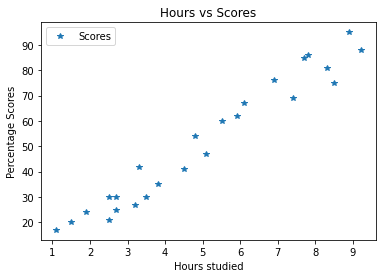

In [93]:
data.plot(x='Hours',y='Scores',style='*')
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scores')
plt.show()

Observation:

Now from the above graph , we can see that there is Positive Linear Relation between number of hours studied and the scores of the students.

# Distribution Plot

C:\Users\sania\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


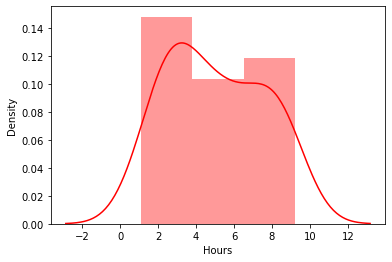

C:\Users\sania\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


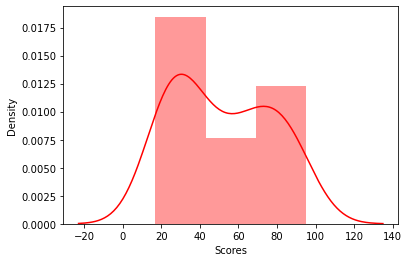

In [94]:
# Lets make a dist plot of all numeric variables

df_numeric = data.select_dtypes(include = np.number)
for column in df_numeric.columns:
    
    sns.distplot(data[column],color = 'red')
    plt.show()

Observations:

The Dist Plot of Hours and Score column are approximately same distributed

# Box Plots for Hours and Scores

Box Plot is a visual method to identify outliers of data.

C:\Users\sania\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours'>

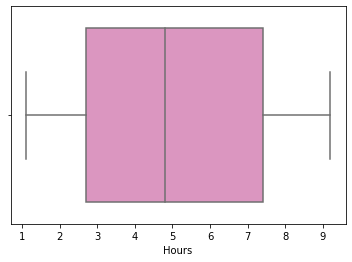

In [95]:
sns.boxplot(data['Hours'],palette='Set2_r')

C:\Users\sania\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Scores'>

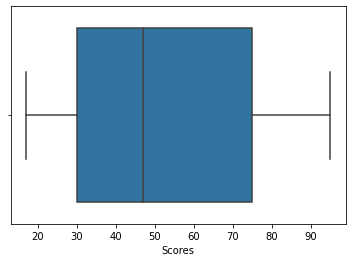

In [96]:
sns.boxplot(data['Scores'])

Observation:

From above 2 Box Plots we can observe that our data doesn't have extreme high and extreme low values. So we can say our data is "Almost Perfectly Distributed".

# Preparing data for Regression

Identify the independent & dependent variables.

Here x = independent/ input variable,
     y = dependent/ output variable

In [97]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

Splitting the data into test & train.

In [98]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size =0.8, random_state =2)

In [99]:
len(x_train),len(x_test),len(y_train),len(y_test)

(20, 5, 20, 5)

In [100]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((20, 1), (5, 1), (20,), (5,))

# Model Building

Machine Learning models can be understood as a program that has been trained to find patterns within the data and based on those patterns, we can make prediction.

First, these models are trained over a set of data and then they are provided an algorithm to extract the pattern from feed data and learn from those data. Once model gets trained , then they can be used to predict the unseen dataset.

# Linear Regression

In [101]:
# Import linear Regression
from sklearn.linear_model import LinearRegression

# Instantiate the Regression
lr = LinearRegression()

# Fit the model
model = lr.fit(x_train,y_train)

## Identify the equation using Slope & Intercept
 y = mx+c

1.5079104828268726
[9.94061514]


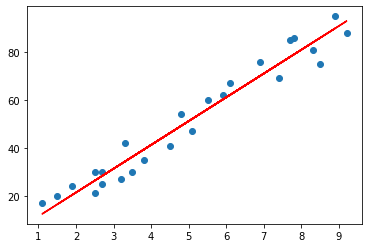

In [102]:
#Plotting the Regression line

# To find the constant(i.e 'c' value)
print(model.intercept_)

# To find the slope(i.e 'm' value)
print(model.coef_)

line = model.coef_ *x + model.intercept_

# Plotting the test data
plt.scatter(x,y)
plt.plot(x,line, color='red')
plt.show()

In [103]:
# To find R^2 value
model.score(x_train,y_train)

0.9423348138802985

Since R^2 value is near to 1, that means model can easily define the data.

# Making Predictions

In [104]:
#Predicting the test set result
print(x_test)
y_pred = lr.predict(x_test)

[[1.1]
 [2.5]
 [1.9]
 [9.2]
 [6.9]]


In [105]:
# Comparing actual vs predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


# Evaluating the model

In [106]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('R^2:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.877039354964484
R^2: 0.9735538080811826


### So we got accuracy of 97% , which is quite good.

# Task2 : What will be the predicted score if a student studies for 9.25 hours per day ?

In [107]:
hours = 9.25
score_pred = lr.predict([[hours]])

print('No. of hours = {}'.format(hours))
print('Predicted score = {}'.format(score_pred[0]))

No. of hours = 9.25
Predicted score = 93.45860055685799


So Percentage Predicted score will be 93.45% , if a student studies for 9.25 hours per day.

# Thank You